In [1]:
import pandas as pd
import numpy as np
import sys,os
import matplotlib.pyplot as plt
from scipy.stats import zscore
from IPython.display import display

In [2]:
data_1 = pd.read_csv('../data/benin-malanville.csv')
df_2 = pd.read_csv('../data/sierraleone-bumbuna.csv')
df_3 = pd.read_csv('../data/togo-dapaong_qc.csv')

# Data Understanding


In [3]:
df_2.head(5)
df_3.head(7)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN
5,2021-10-25 00:06,-1.2,0.0,0.0,0.0,0.0,24.9,93.9,1.2,1.4,0.3,226.2,4.8,977,0,0.0,24.8,24.5,NaN
6,2021-10-25 00:07,-1.1,0.0,0.0,0.0,0.0,24.9,93.8,1.2,1.4,0.3,226.4,0.9,977,0,0.0,24.8,24.5,NaN


# Checking the Data Types


In [4]:
data_1.dtypes
df_2.dtypes
df_3.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [5]:
data_1.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
5,2021-08-09 00:06,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.8,0.0,0.4,0.1,119.1,0.0,997,0,0.0,26.4,26.3,NaN
6,2021-08-09 00:07,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.0,0.0,0.0,0.0,0.0,997,0,0.0,26.5,26.3,NaN
7,2021-08-09 00:08,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.7,1.3,0.6,126.8,2.8,997,0,0.0,26.5,26.3,NaN
8,2021-08-09 00:09,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.4,1.1,0.5,124.9,5.5,997,0,0.0,26.5,26.4,NaN
9,2021-08-09 00:10,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.5,1.1,0.5,114.2,5.1,997,0,0.0,26.5,26.4,NaN


# Checking the missing value


In [7]:
missing_values = data_1.isnull().sum()
display("Missing Values In Benin-Malanville:")
display(missing_values)

'Missing Values In Benin-Malanville:'

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [8]:
missing_values = df_2.isnull().sum()
display("Missing Values In Benin-Malanville:")
display(missing_values)

'Missing Values In Benin-Malanville:'

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [9]:
missing_values = df_3.isnull().sum()
display("Missing Values In Benin-Malanville:")
display(missing_values)

'Missing Values In Benin-Malanville:'

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [11]:
negative_values = data_1.loc[(data_1['GHI'] < 0) | (data_1['DNI'] < 0) | (data_1['DHI'] < 0)]
if not negative_values.empty:
    display("Negative Values Detected In Benin-Malanville:")
    display(negative_values)

'Negative Values Detected In Benin-Malanville:'

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN


In [12]:
negative_values = df_2.loc[(df_2['GHI'] < 0) | (df_2['DNI'] < 0) | (df_2['DHI'] < 0)]
if not negative_values.empty:
    display("Negative Values Detected In Benin-Malanville:")
    display(negative_values)

'Negative Values Detected In Benin-Malanville:'

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN


In [13]:
negative_values = df_3.loc[(df_2['GHI'] < 0) | (df_3['DNI'] < 0) | (df_3['DHI'] < 0)]
if not negative_values.empty:
    display("Negative Values Detected In Benin-Malanville:")
    display(negative_values)

'Negative Values Detected In Benin-Malanville:'

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525596,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525597,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,NaN
525598,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN


# Summary Statistics


In [14]:
summary_stats = data_1.describe()
display("Summary Statistics for Benin-Malanville")
display(summary_stats)

'Summary Statistics for Benin-Malanville'

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [15]:
summary_stats = df_2.describe()
display("Summary Statistics for Benin-Malanville")
display(summary_stats)

'Summary Statistics for Benin-Malanville'

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [16]:
summary_stats = df_3.describe()
display("Summary Statistics for Benin-Malanville")
display(summary_stats)

'Summary Statistics for Benin-Malanville'

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


# Checking Duplicate values


In [17]:
data_1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
525595    False
525596    False
525597    False
525598    False
525599    False
Length: 525600, dtype: bool

In [18]:
df_2.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
525595    False
525596    False
525597    False
525598    False
525599    False
Length: 525600, dtype: bool

In [19]:
df_3.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
525595    False
525596    False
525597    False
525598    False
525599    False
Length: 525600, dtype: bool

# Correlation Analysis


Correlation Analysis for Benin-Malanville


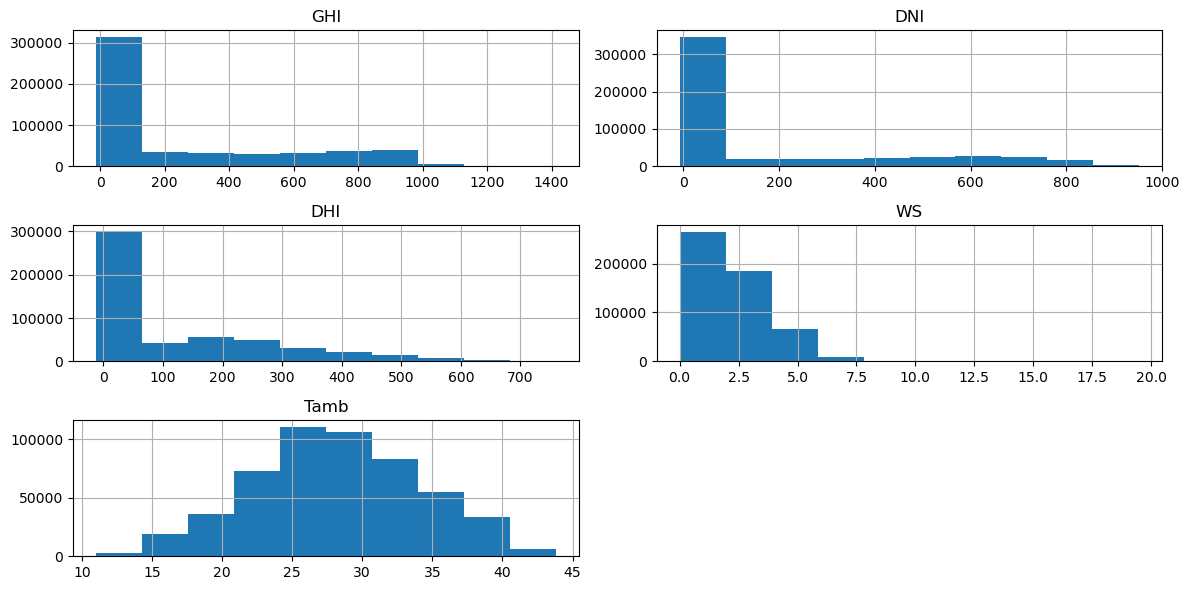

In [20]:
data_1[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins=10, figsize=(12, 6))
plt.tight_layout()
print("Correlation Analysis for Benin-Malanville")
plt.show()

Correlation Analysis for Benin-Malanville


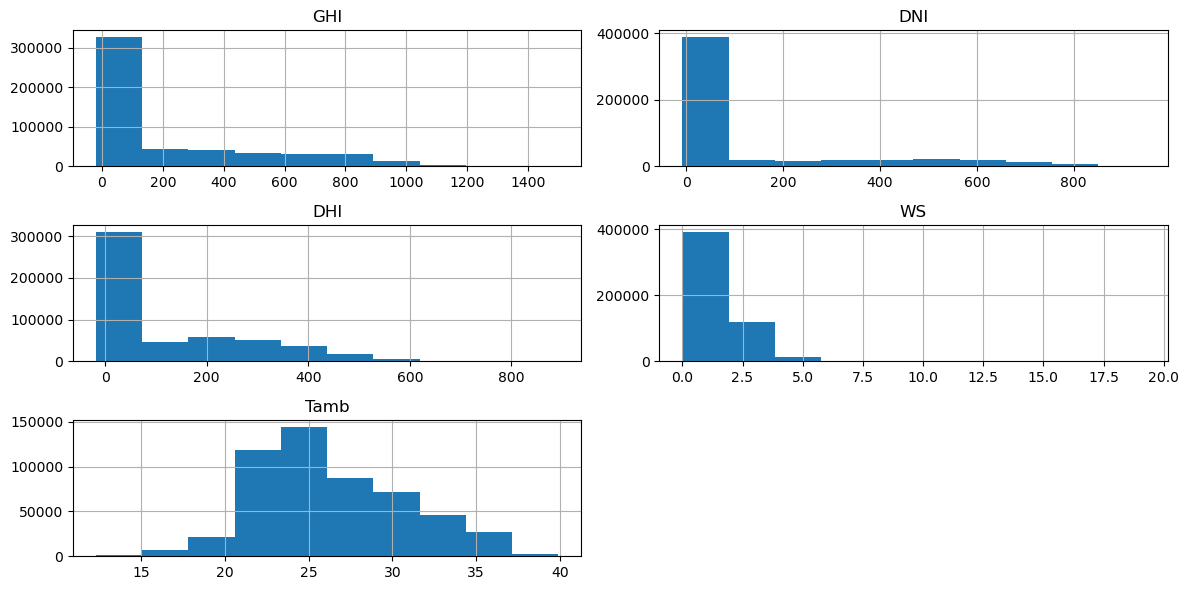

In [21]:
df_2[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins=10, figsize=(12, 6))
plt.tight_layout()
print("Correlation Analysis for Benin-Malanville")
plt.show()


Correlation Analysis for Benin-Malanville


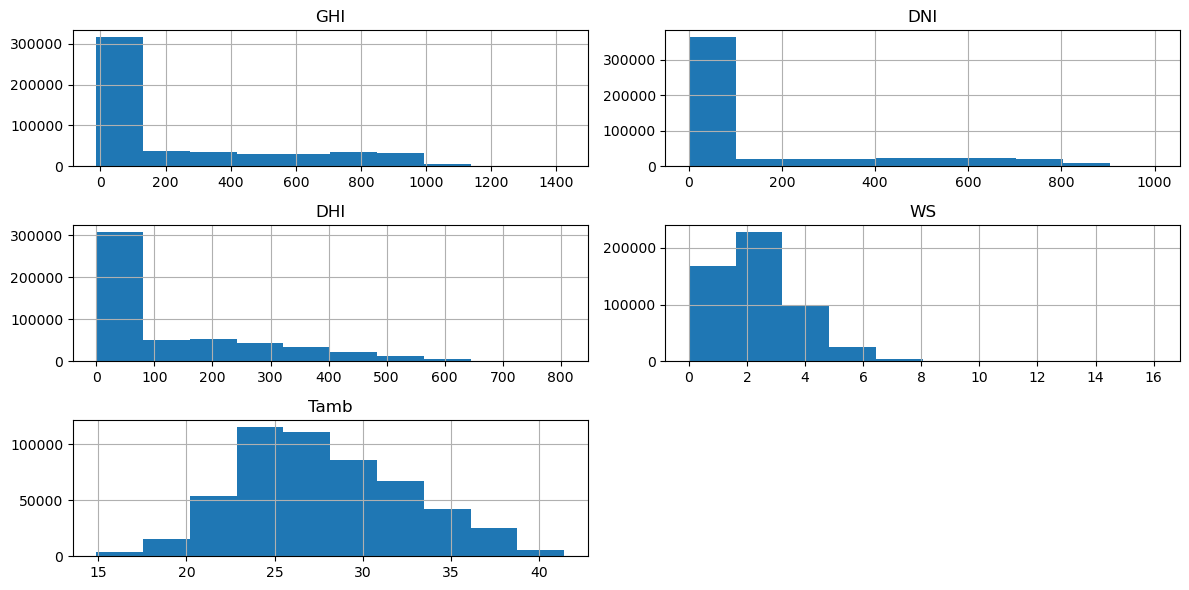

In [22]:
df_3[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins=10, figsize=(12, 6))
plt.tight_layout()
print("Correlation Analysis for Benin-Malanville")
plt.show()

# Box Plot Analysis


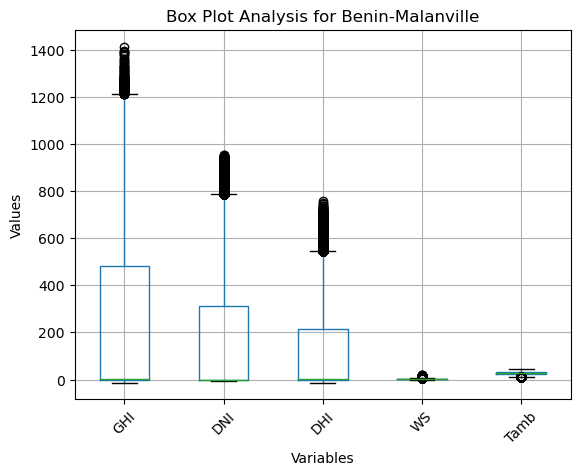

In [24]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
selected_data_1 = data_1[variables]

# Creating a box plot for each variable
selected_data_1.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot Analysis for Benin-Malanville')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

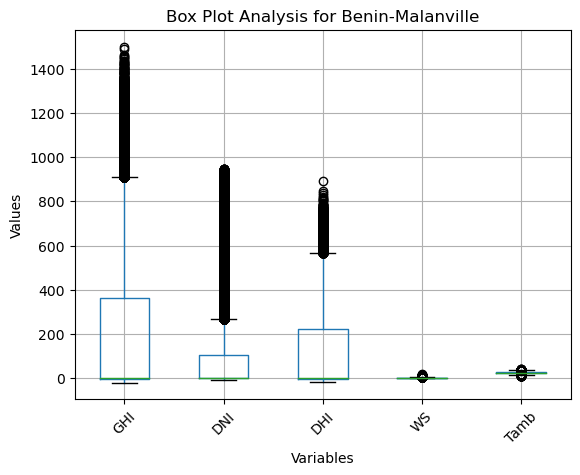

In [25]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
selected_data = df_2[variables]

# Creating a box plot for each variable
selected_data.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot Analysis for Benin-Malanville')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

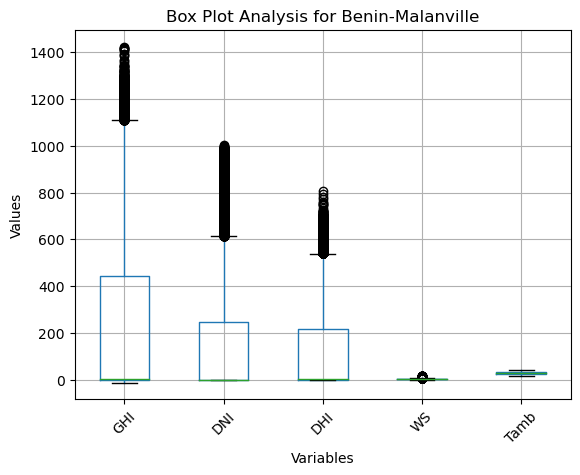

In [26]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
selected_data = df_3[variables]

# Creating a box plot for each variable
selected_data.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot Analysis for Benin-Malanville')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

# Time Series Analysis


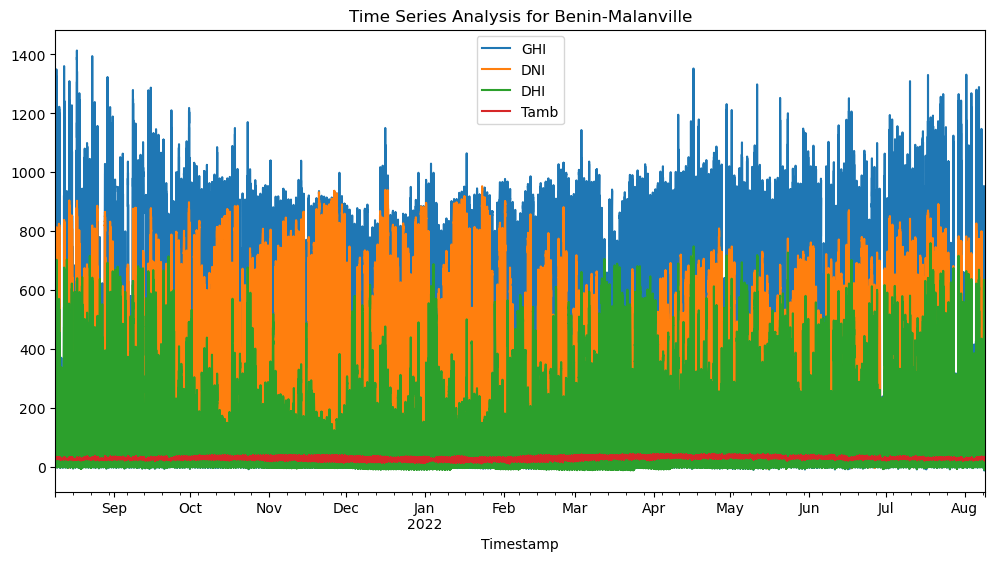

In [27]:
data_1['Timestamp'] = pd.to_datetime(data_1['Timestamp'])
data_1.set_index('Timestamp', inplace=True)
data_1[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 6))
plt.title("Time Series Analysis for Benin-Malanville")
plt.show()

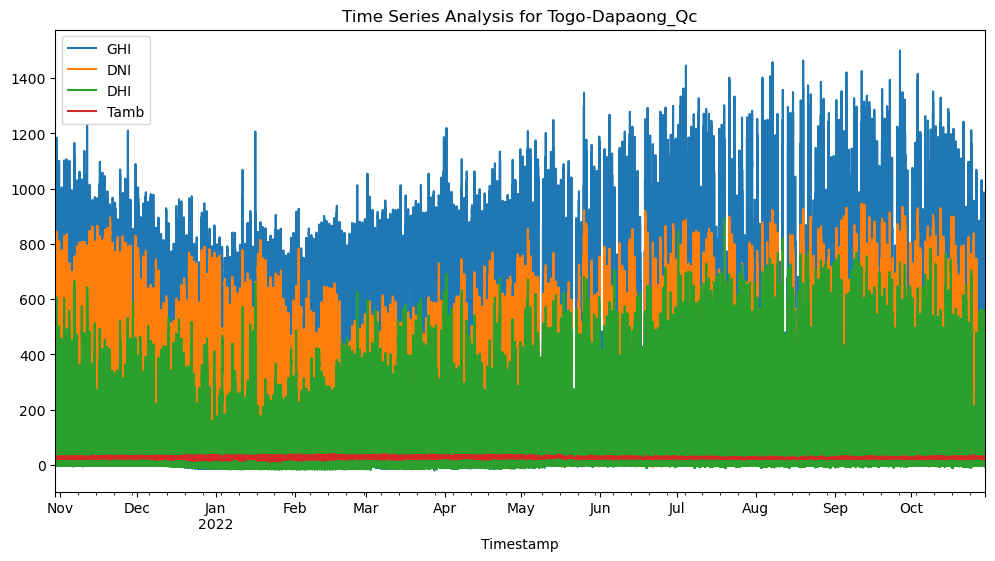

In [28]:
df_2['Timestamp'] = pd.to_datetime(df_2['Timestamp'])
df_2.set_index('Timestamp', inplace=True)
df_2[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 6))
plt.title("Time Series Analysis for Togo-Dapaong_Qc")
plt.show()

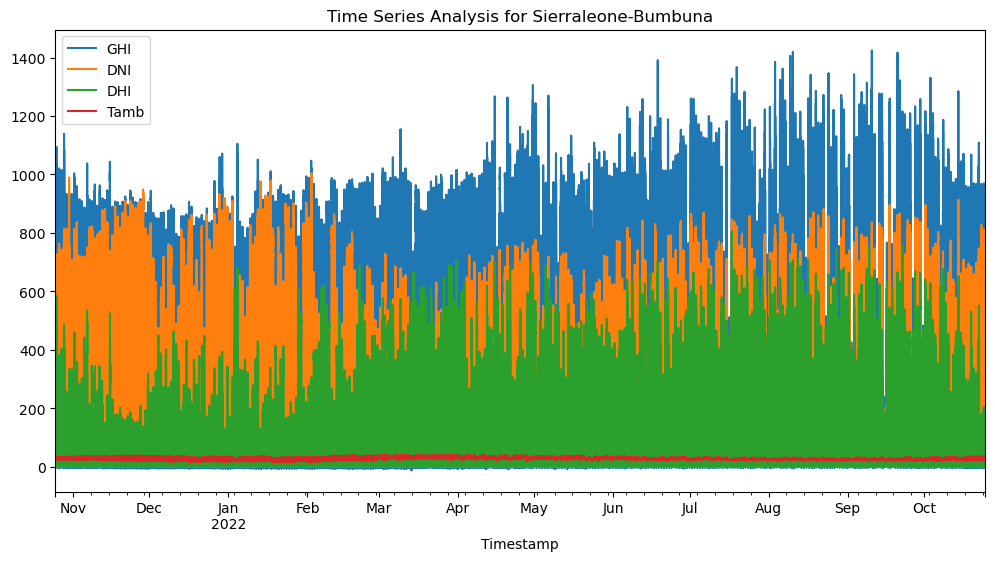

In [29]:
df_3['Timestamp'] = pd.to_datetime(df_3['Timestamp'])
df_3.set_index('Timestamp', inplace=True)
df_3[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 6))
plt.title("Time Series Analysis for Sierraleone-Bumbuna")
plt.show()

# Correlation Analysis GHI vs Tamb


Correlation Analysis for Benin-Malanville


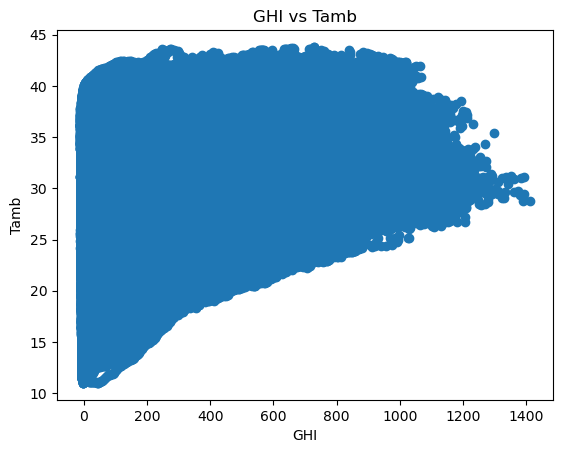

In [30]:
plt.scatter(data_1['GHI'], data_1['Tamb'])
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb')
print("Correlation Analysis for Benin-Malanville")
plt.show()

Correlation Analysis for Sierraleone-Bumbuna


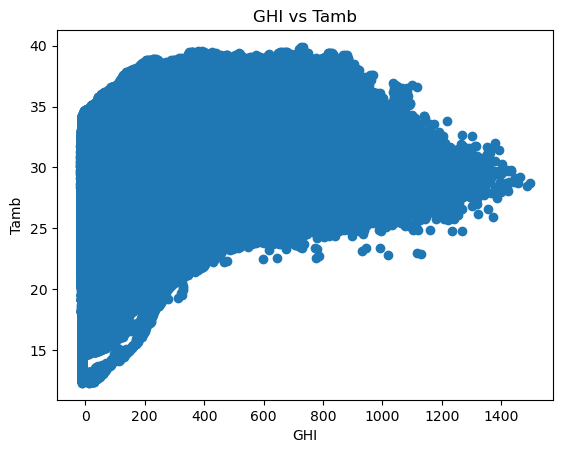

In [31]:
plt.scatter(df_2['GHI'], df_2['Tamb'])
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb')
print("Correlation Analysis for Sierraleone-Bumbuna")
plt.show()

Correlation Analysis for Togo-Dapaong_Qc


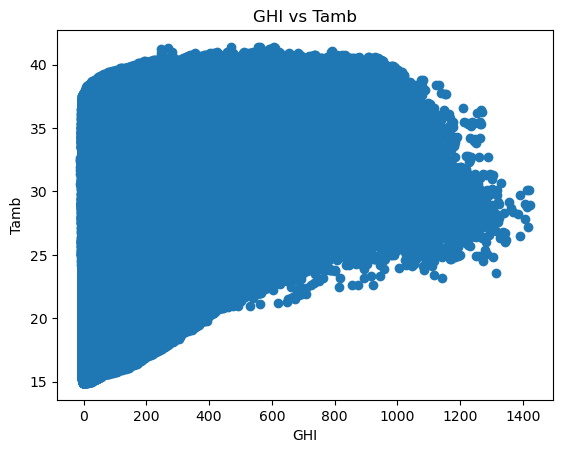

In [32]:
plt.scatter(df_3['GHI'], df_3['Tamb'])
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb')
print("Correlation Analysis for Togo-Dapaong_Qc")
plt.show()

# scatter matrices.


In [37]:
print(data_1.columns)

Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Comments'],
      dtype='object')


In [40]:
print("Columns:", df_2.columns)
if 'Timestamp' in df.columns:
    print(df_2['Timestamp'])
else:
    print("Column 'Timestamp' not found.")

Columns: Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Comments'],
      dtype='object')


NameError: name 'df' is not defined

In [38]:
df_2['Timestamp'] = pd.to_datetime(df_2['Timestamp'])
correlation_matrix = data.corr()
display("Correlation Matrix for Sierraleone-Bumbuna:")
display(correlation_matrix)

KeyError: 'Timestamp'

In [35]:
data_1['Timestamp'] = pd.to_datetime(data_1['Timestamp'])
correlation_matrix = data_1.corr()
display("Correlation Matrix for Benin-Malanville:")
display(correlation_matrix)

KeyError: 'Timestamp'